<a href="https://colab.research.google.com/github/jtanzi56/Prediction-of-Product-Sales/blob/main/Grocery_Sales_Prediction_jtanzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prediction of Product Sales
Jacob Tanzi



#  Parts 1 & 2

Part 1
Overview of the steps you will need to complete for part one. 

1) Create a GitHub Account

2) Set up a GitHub repository that will house your portfolio.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!


Part 2: 

Continue to work off of the GitHub repository 

The task is to use Pandas to load in the data and start exploring and cleaning it.  

- Download the data using this link in the learn platform.
- Use Pandas to read the sales prediction data set into Google Colab.

- Explore the data and clean it

 * Be sure to address each of the following tasks:
 
1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

## Imports

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



##Load Data


In [150]:
salesp = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [151]:
#loading in as panda dataframe
df_sp = pd.read_csv(salesp)

In [152]:
#inspecting with head and info
df_sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [153]:
df2_sp = df_sp.copy()

In [154]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Data Cleaning


In [155]:
#how many rows/col
df_sp.shape

(8523, 12)

In [156]:
# checking data types
df_sp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object



*   no duplicate columns 
*   dtypes look good so far



In [157]:
#checking for duplicate rows
print(f'There are {df_sp.duplicated().sum()} duplicate rows.')
#checking for duplicate data
df_sp.duplicated().sum()

There are 0 duplicate rows.


0



*   No duplicate rows
*   No duplicate data



In [158]:
#checking for missing values
df_sp.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [159]:
# checking % missing values
df_sp.isna().sum() / len(df_sp) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64



*   Item weight missing 1463 for 17%
*   Outlet Size missing 2410 for 28%






1.   Drop rows with missing values
2.   replace missing values with 'Unknown'
3.   impute missing values using most frequent value

checking how many rows with missing values



In [160]:
## Diplays only rows with nan values
df_sp[df_sp.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232




*   Too many rows with missing values to remove
*   will look into how many unique entries for Item weight.
*   will look for correlation in Outlet Size and other column.




In [161]:
df_sp.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [162]:
df_sp.nunique()/ len(df_sp) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [163]:
# slicing weight and type to see any consistency
df_sp.loc[:, ['Item_Weight', 'Item_Type']] 

,Item_Weight,Item_Type
0,9.300,Dairy
1,5.920,Soft Drinks
2,17.500,Meat
3,19.200,Fruits and Vegetables
4,8.930,Household
...,...,...
8518,6.865,Snack Foods
8519,8.380,Baking Goods
8520,10.600,Health and Hygiene
8521,7.210,Snack Foods


In [164]:
#creating filter for null values
null_Item_Weight = df_sp['Item_Weight'].isna()

In [165]:
df_sp[null_Item_Weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [166]:

df_sp.groupby('Item_Weight')['Item_Type'].sum().sort_values(ascending=True)

Item_Weight
5.425                  Baking GoodsBaking GoodsBaking Goods
7.090      Baking GoodsBaking GoodsBaking GoodsBaking Goods
7.445      Baking GoodsBaking GoodsBaking GoodsBaking Goods
5.635      Baking GoodsBaking GoodsBaking GoodsBaking Goods
4.920     Baking GoodsBaking GoodsBaking GoodsBaking Goo...
                                ...                        
16.000    Starchy FoodsStarchy FoodsFrozen FoodsDairyDai...
12.300    Starchy FoodsStarchy FoodsHouseholdSnack Foods...
7.060     Starchy FoodsStarchy FoodsStarchy FoodsStarchy...
7.600     Starchy FoodsStarchy FoodsStarchy FoodsStarchy...
7.435     Starchy FoodsStarchy FoodsStarchy FoodsStarchy...
Name: Item_Type, Length: 415, dtype: object



*   Item types with missing Item Weights have too many different values to draw con-
*         IE- all nul weights are canned foods, therefore N/A could apply 
*   Will replace with unknown



In [167]:
mean_Item_Weight = df_sp['Item_Weight'].mean()

df_sp["Item_Weight"].fillna(value = mean_Item_Weight, inplace = True)



In [168]:
df_sp[null_Item_Weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.857645,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.857645,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,12.857645,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,12.857645,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,12.857645,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,12.857645,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [169]:
null_sums = df_sp.isna().sum()

null_sums

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [170]:
df_sp.loc[:, ['Outlet_Size', 'Outlet_Type']] 

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,NaN,Grocery Store
4,High,Supermarket Type1
...,...,...
8518,High,Supermarket Type1
8519,NaN,Supermarket Type1
8520,Small,Supermarket Type1
8521,Medium,Supermarket Type2


In [171]:
null_Outlet_Size = df_sp['Outlet_Size'].isna()
null_Outlet_Size

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [172]:
df_sp.loc[:, ['Outlet_Size', 'Outlet_Establishment_Year']] 

,Outlet_Size,Outlet_Establishment_Year
0,Medium,1999
1,Medium,2009
2,Medium,1999
3,NaN,1998
4,High,1987
...,...,...
8518,High,1987
8519,NaN,2002
8520,Small,2004
8521,Medium,2009


In [173]:
df_sp[null_Outlet_Size]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [174]:
df_sp['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64



*   No connection found between missing outlet size and Outlet_Location_Type or	Outlet_Type
*  Will replace missing Outlet_Size with 'Unknown' to not add bias to another label.



In [175]:
df_sp['Outlet_Size'] = df_sp['Outlet_Size'].fillna('Unknown')
df_sp['Outlet_Size'].value_counts(dropna=False)

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

**6) Confirm that there are no missing values after addressing them.**

In [176]:
print(df_sp.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [177]:
print(df_sp.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


**Find and fix any inconsistent categories of data**

In [178]:
data_types = df_sp.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [179]:
for col in str_cols:
    print(f'- {col}:')
    print(df_sp[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

**Item_Fat_Content has inconsistencies**


1.   LF and low fat should be  Low Fat 
2.   reg should be Regular
3.   Using .replace() to correct the inconsistent values in the 'Item_Fat' 




In [180]:
Item_Fat_dict = {'low fat':'Low Fat',
                   'LF':'Low Fat',
                   'reg':'Regular'}

df_sp['Item_Fat_Content'] = df_sp['Item_Fat_Content'].replace(Item_Fat_dict)

In [181]:
df_sp['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary Statistics for Numeric Features




- numerical columns, will obtain the summary statistics of each (min, max, mean).

In [182]:
df_sp.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


For any numerical columns, obtain the summary statistics of each
 (min, max, mean)

In [183]:
# obtain the summary statistics of each (min, max, mean)
df_sp.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [184]:
#mean min and max for numeric column 
stats =  df_sp.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis


#  Part 3





For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

**Importing**

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Getting data info

In [186]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [187]:
df_sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Looking for numeric columns

In [188]:
num_columns = df_sp.select_dtypes('number').columns
num_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [189]:
df_sp['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

## Exploratory Visuals & Analysis

**Will run Histograms on some of the numeric columns** 

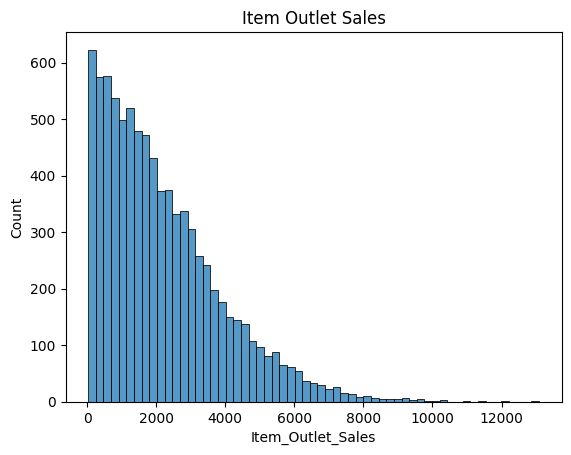

In [190]:

ax = sns.histplot(data=df_sp, x='Item_Outlet_Sales')
ax.set_title('Item Outlet Sales')
ax.ticklabel_format(style='plain');

**Trying %**

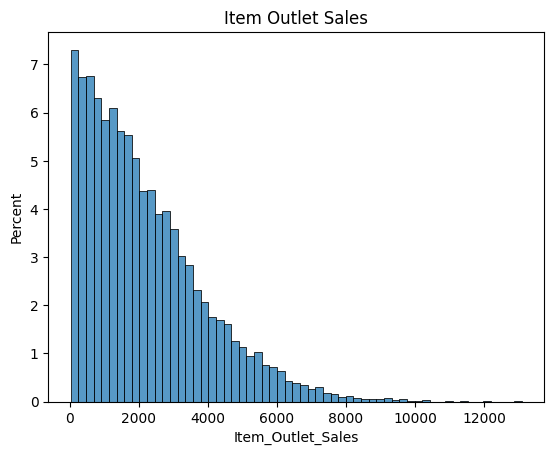

In [191]:
ax = sns.histplot(data=df_sp, x='Item_Outlet_Sales', stat='percent')
ax.set_title('Item Outlet Sales')
ax.ticklabel_format(style='plain');

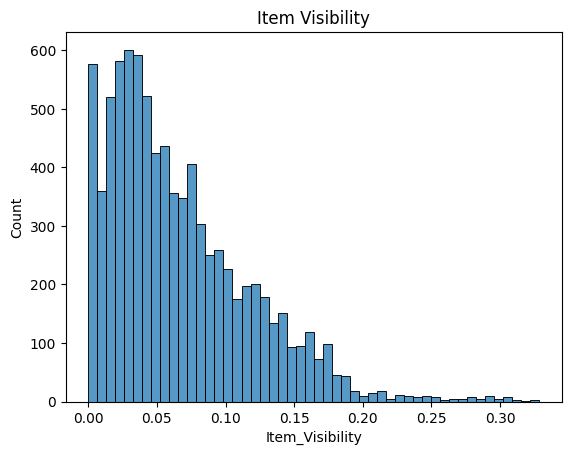

In [192]:
ax = sns.histplot(data=df_sp, x='Item_Visibility')
ax.set_title('Item Visibility');


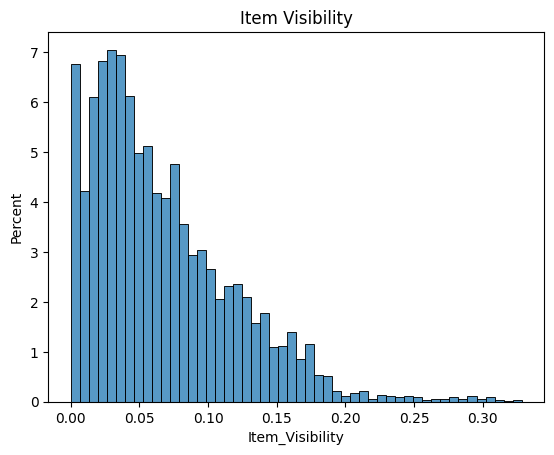

In [193]:
#as a %
ax = sns.histplot(data=df_sp, x='Item_Visibility', stat= 'percent')
ax.set_title('Item Visibility');

* not seeing value in current histograms, switching to object dtypes

In [194]:
ob_columns = df_sp.select_dtypes('object').columns
ob_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

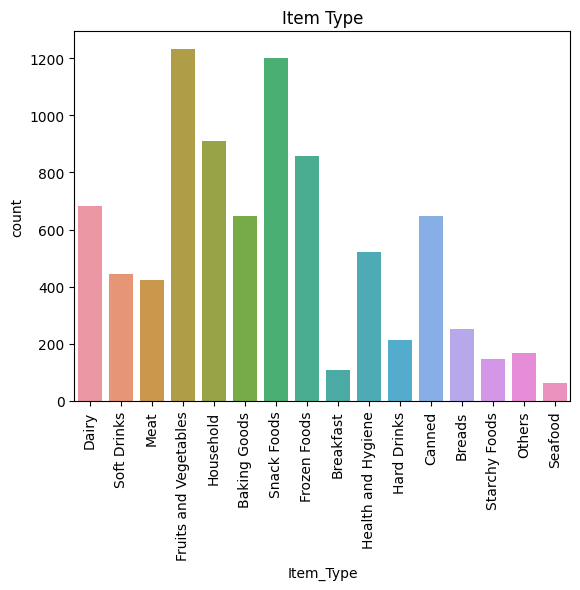

In [195]:
ax = sns.countplot(data=df_sp, x='Item_Type')
ax.set_title('Item Type');
ax.tick_params(axis='x', rotation = 90);

**object types with histogram more legible**

### Visualizing with Boxplot

*back to numeric*

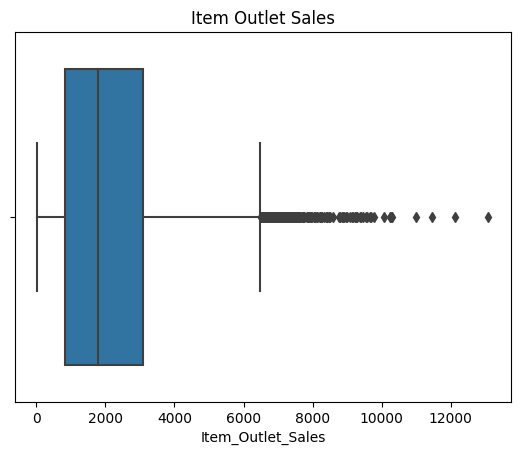

In [196]:
ax = sns.boxplot(data=df_sp, x='Item_Outlet_Sales')
ax.set_title('Item Outlet Sales');

### EDA for Correlated Features

getting correlations

In [197]:
corr = df_sp.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


running heatmap of correlations

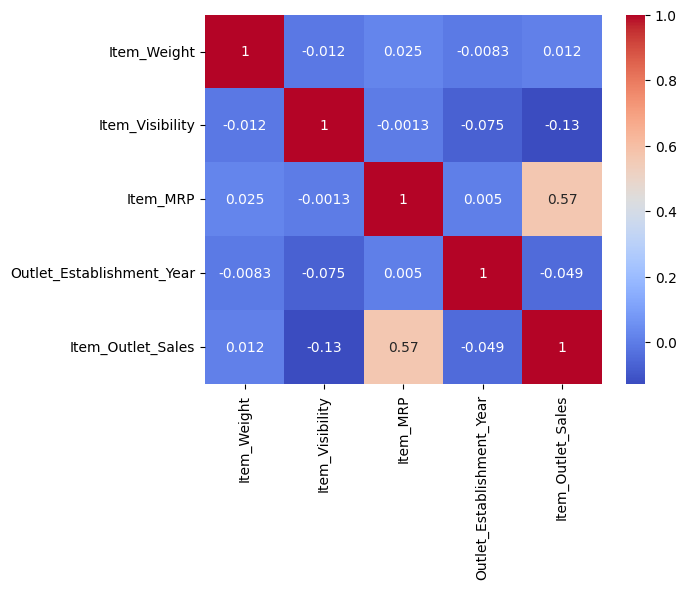

In [198]:
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

#  Part 4 

##Explanatory Data Analysis



For Part 4, our task is to build several data visualizations to help stakeholders better understand trends in the data. 

*Taking a look at data*

In [199]:
df_sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [200]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [201]:
df_sp.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800




#### Does Outlet_Type have an effect on what items are sold? 


In [202]:
df_sp.describe(include='object') 

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


In [203]:
df_sp['Item_Type'].describe() 

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [204]:
df_sp['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [205]:
item_typesales = df_sp.groupby('Item_Type')['Item_Outlet_Sales'].mean()
item_typesales

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64


Looking at total sales per outlet type to get an understanding who performing where

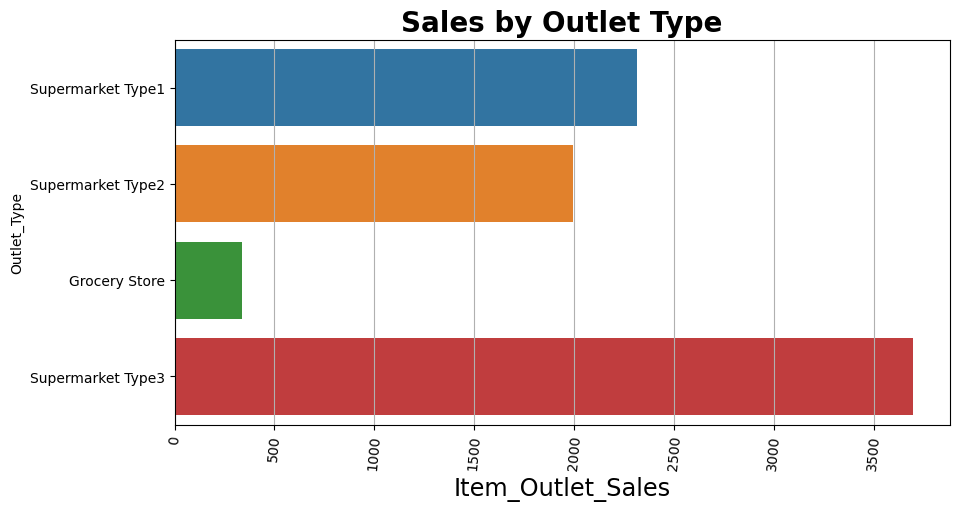

In [206]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df_sp, y='Outlet_Type', x='Item_Outlet_Sales', errorbar = None)
plt.xticks(rotation = 85);

ax.set_title('Sales by Outlet Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='xx-large')
ax.grid(axis = 'x');

The outlet type Supermarket 3 is out selling other by far



.

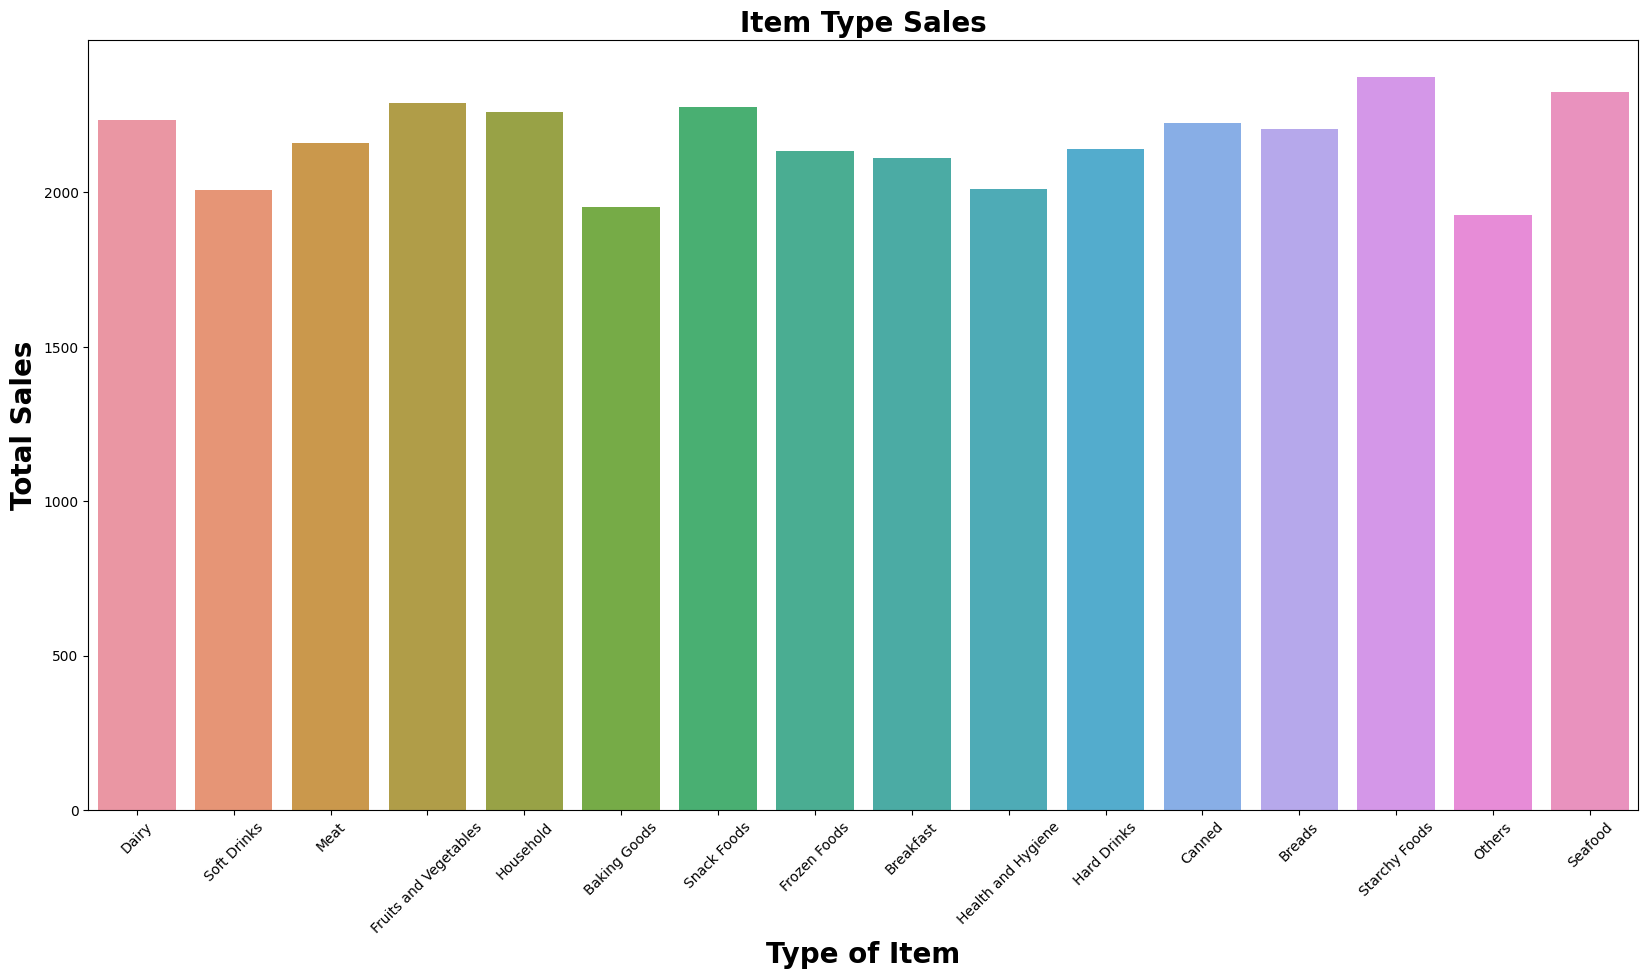

In [207]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df_sp,x='Item_Type', y = 'Item_Outlet_Sales', errorbar = None)
plt.xticks(rotation = 45)
ax.set_title('Item Type Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Type of Item', fontsize = 20, fontweight = 'bold')
ax.set_ylabel('Total Sales', fontsize = 20, fontweight = 'bold');


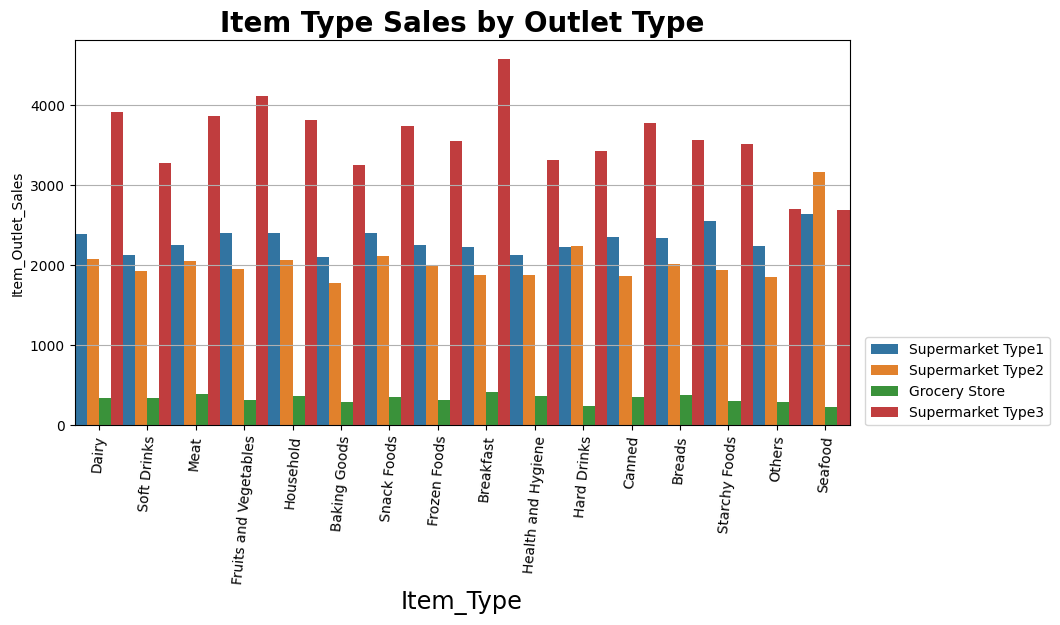

In [208]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df_sp, x='Item_Type', y='Item_Outlet_Sales',hue='Outlet_Type', width = 1, ax=ax, errorbar = None)
plt.xticks(rotation = 85);
ax.legend(loc=(1.02,0));
ax.set_title('Item Type Sales by Outlet Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='xx-large')
ax.grid(axis = 'y');

outlet type only has an effect on Seafood Sales, outside of that, Supermarket Type 3, sells the most of everyother Item Type 

#### Recomendation  
* Potential for Supermarket Type 3 to increase seafood sales. Pair up Supermarket Type 2 with Supermarket Type 3. 
 * What can Type 3 learn from Type 2 to increase their seafood sales?

# Part 5


## Preprocesing for Machine Learning


For Part 5, you will go back to your original dataset with the goal of preventing data leakage.

You should load a fresh version of the original data start your cleaning process over to ensure there is no data leakage


In [209]:
# Imports


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

In [210]:
df2 = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/sales_predictions_2023.csv')


* Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)


In [211]:
# checking data loaded
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [212]:
# checking for duplicated row
df2.duplicated().sum()

0

In [213]:
#Confirming 'Item_Identifier' has all unique values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [214]:
# checking for inconsistencies in categorical data
data_types = df2.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [215]:
for col in str_cols:
    print(f'- {col}:')
    print(df2[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

In [216]:
# inconsistencies in 'fat' categorical data, fixing with dict

Item_Fat_dict = {'low fat':'Low Fat',
                   'LF':'Low Fat',
                   'reg':'Regular'}

df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace(Item_Fat_dict)

In [217]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [218]:
# choosing features 
df2.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [219]:
df2.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


## EDA Functions to help id features

In [220]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df2, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna 
  temp_df2 = df2.copy()
  # Before filling nulls, save null value counts and percent for printing 
  null_count = temp_df2[x].isna().sum()
  null_perc = null_count/len(temp_df2)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df2[x] = temp_df2[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
  sns.countplot(data=temp_df2, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')
  
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()
      
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df2[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df2[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df2) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df2, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  
  ## Save null value counts and percent for printing 
  null_count = df2[x].isna().sum()
  null_perc = null_count/len(df2)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df2, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df2, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()
  
  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df2[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df2[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df2) * 100
  
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes
  

In [221]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df2, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna 
  temp_df2 = df2.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df2[x] = temp_df[x].fillna(placeholder)
  
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df2 = temp_df2.dropna(subset=[x]) 
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  
    # Barplot 
  sns.barplot(data=temp_df2, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)
  
  # Boxplot
  sns.stripplot(data=temp_df2, x=x, y=y, hue=x, ax=ax, 
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  
  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df2, x, y='rating',
                           figsize=(6,4), 
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added 
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df2[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df2, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [222]:
data_types = df2.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


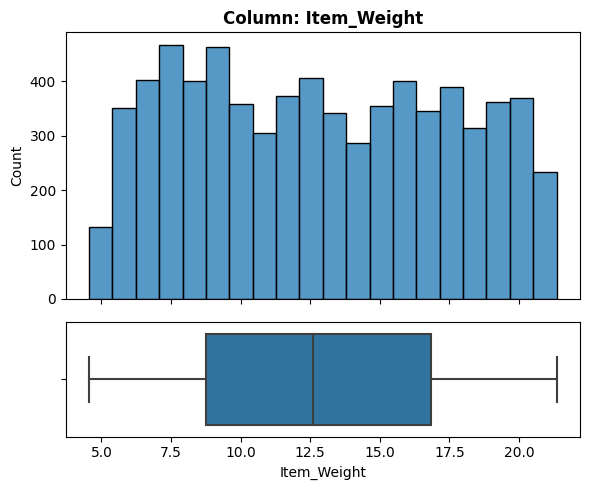

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [224]:
feature = "Item_Weight"
df2[feature].dtype
explore_numeric(df2,feature);

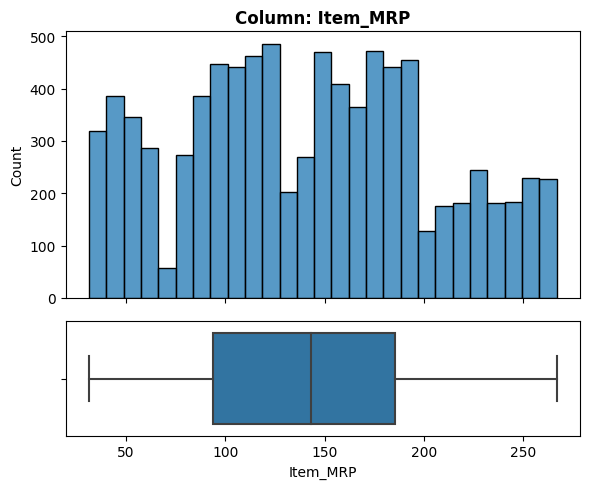

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [225]:
feature = "Item_MRP"
df2[feature].dtype
explore_numeric(df2,feature);

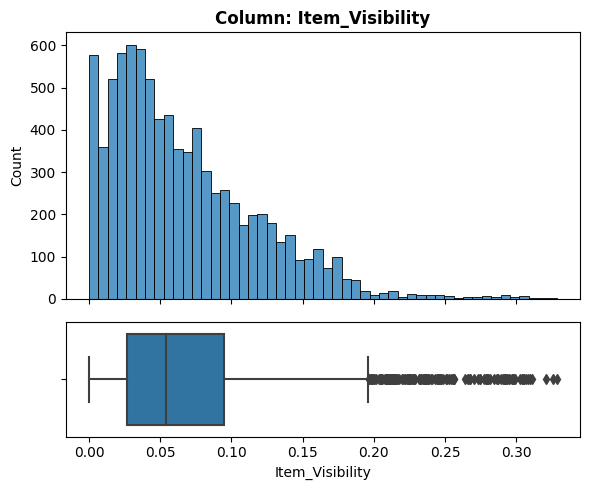

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [226]:
feature = "Item_Visibility"
df2[feature].dtype
explore_numeric(df2,feature);

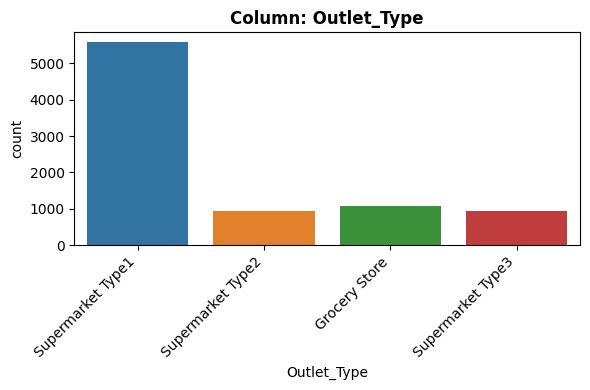

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [227]:

feature = "Outlet_Type"
df2[feature].dtype
explore_categorical(df2,feature);

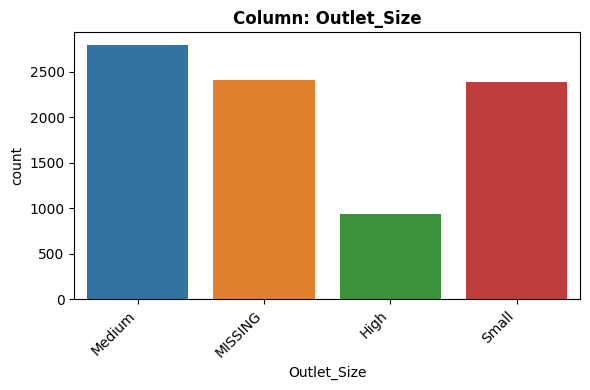

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [228]:

feature = "Outlet_Size"
df2[feature].dtype
explore_categorical(df2,feature);

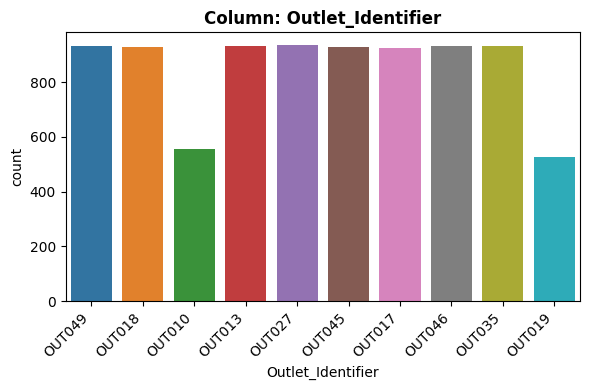

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [229]:
feature = "Outlet_Identifier"
df2[feature].dtype
explore_categorical(df2,feature);

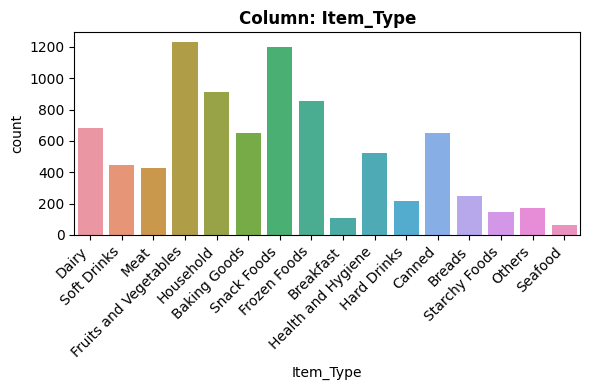

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [230]:
feature = "Item_Type"
df2[feature].dtype
explore_categorical(df2,feature);

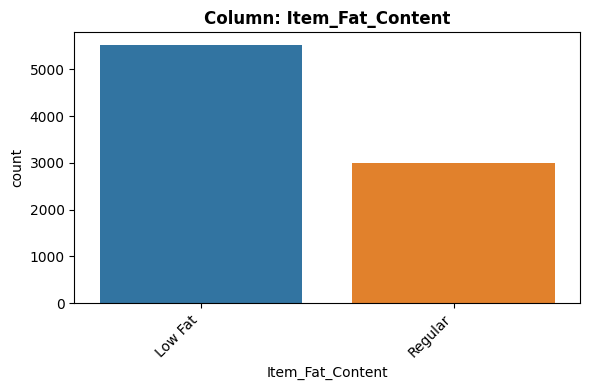

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [231]:
feature = "Item_Fat_Content"
df2[feature].dtype
explore_categorical(df2,feature);

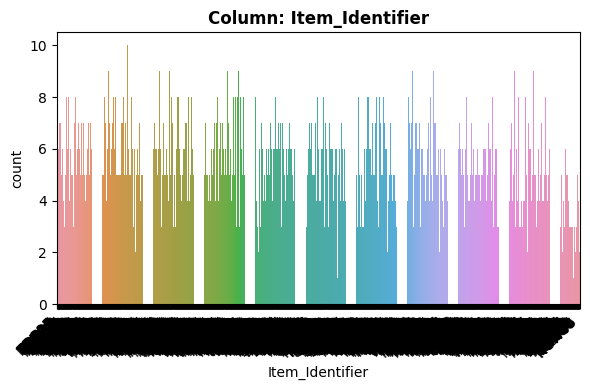

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [232]:
feature = "Item_Identifier"
df2[feature].dtype
explore_categorical(df2,feature);

* looked into columns, will drop- 

 * Item_Identifier(too many unique values)
 * Outlet_Identifier(no relation to target)
 * Item_Visibility ( Most common value: '0.0' occurs 526 times, no relation to target)
 * Outlet_Establishment_Year(too many unique values)



In [233]:
df2.drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'Item_Visibility', 'Outlet_Establishment_Year'], axis = 1, inplace = True)


In [234]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Type             8523 non-null   object 
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Size           6113 non-null   object 
 5   Outlet_Location_Type  8523 non-null   object 
 6   Outlet_Type           8523 non-null   object 
 7   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(3), object(5)
memory usage: 532.8+ KB


* Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.


### Defining X and y

In [235]:

target = 'Item_Outlet_Sales'
X = df2.drop(columns=[target]).copy()
y = df2[target].copy()

### Train-Test-Split


In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

* Create a preprocessing object to prepare the dataset for Machine Learning
* Make sure your imputation of missing values occurs after the train test split using SimpleImputer.




### Making a Preprocessing Pipeline

In [237]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [238]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
num_missing = SimpleImputer(strategy='constant', fill_value=0)

In [239]:
num_pipe = make_pipeline(num_missing, scaler)

In [240]:
number_tuple = ('numeric', num_pipe, num_selector)
category_tuple = ('categorical',ohe, cat_selector)

In [241]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([number_tuple, 
                                       category_tuple], 
                                       remainder='drop', verbose_feature_names_out=False)

In [242]:
from sklearn import set_config
set_config(transform_output='pandas')

In [243]:
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db05b0>),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db2110>)],
                  verbose_feature_names_out=False)

In [244]:
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [245]:
preprocessor.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Weight,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.880498,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.709991,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,0.260473,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-0.417679,-0.952591,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.345517,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.197570,-0.044657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,0.764243,-1.058907,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,1.074256,1.523027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,1.500523,-0.383777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Part 6


Finalize your sales prediction, the goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.



1. Your first task is to build a linear regression model to predict sales.

 * Build a linear regression model.
 * Evaluate the performance of your model based on r^2.
 * Evaluate the performance of your model based on rmse.




## Maching Learning - Training the Models

### Imports for Machine Learning

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import set_config
from IPython.core.display import clear_output
set_config(display='diagram')

set_config(transform_output='pandas')

Function for evaluation

In [247]:
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [248]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db05b0>),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db2110>)],
                  verbose_feature_names_out=False)

### Linear Regression Model

In [249]:
lin_reg = LinearRegression()

lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

lin_reg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db05b0>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db2110>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [250]:
train_preds = lin_reg_pipe.predict(X_train)
test_preds = lin_reg_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Linear Regression Train')
eval_regression(y_test, test_preds, name='Linear Regression Test')

Linear Regression Train Scores
MAE: 847.2173 
MSE: 1,299,084.0935 
RMSE: 1,139.7737 
R2: 0.5610

Linear Regression Test Scores
MAE: 804.9629 
MSE: 1,196,932.5739 
RMSE: 1,094.0441 
R2: 0.5662



#### Tuning liner model with Lasso

In [251]:
from sklearn.linear_model import Lasso

In [252]:
lasso = Lasso()
lasso_pipe = make_pipeline(preprocessor, lasso)
lasso_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db05b0>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db2110>)],
                                   verbose_feature_names_out=False)),
                ('lasso', Lasso())])

In [253]:
train_preds = lasso_pipe.predict(X_train)
test_preds = lasso_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Lasso Linear Train')
eval_regression(y_test, test_preds, name='Lasso Linear Test')

Lasso Linear Train Scores
MAE: 847.0274 
MSE: 1,299,511.4789 
RMSE: 1,139.9612 
R2: 0.5609

Lasso Linear Test Scores
MAE: 803.7264 
MSE: 1,194,063.4234 
RMSE: 1,092.7321 
R2: 0.5672



In [254]:

alphas = [.0001, .001, .01, .1, 1, 10, 100, 1000]
scores = pd.DataFrame(index=alphas, columns=['Train R2', 'Test R2'])
for alpha in alphas:
   clear_output(wait=True)
   print(f'testing alpha of {alpha} of {alphas}')
   lasso = Lasso(alpha=alpha)
   lasso_pipe = make_pipeline(preprocessor, lasso)
   lasso_pipe.fit(X_train, y_train)

   train_pred = lasso_pipe.predict(X_train)
   test_pred = lasso_pipe.predict(X_test)

   train_r2score = r2_score(y_train, train_pred)
   test_r2score = r2_score(y_test, test_pred)

   scores.loc[alpha, 'Train R2'] = train_r2score
   scores.loc[alpha, 'Test R2'] = test_r2score

testing alpha of 1000 of [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [255]:
scores

,Train R2,Test R2
0.0001,0.561041,0.566167
0.0010,0.561041,0.566168
0.0100,0.561041,0.566181
0.1000,0.561039,0.566287
1.0000,0.560895,0.567208
10.0000,0.558567,0.568117
100.0000,0.495609,0.506008
1000.0000,0.0,-0.004772


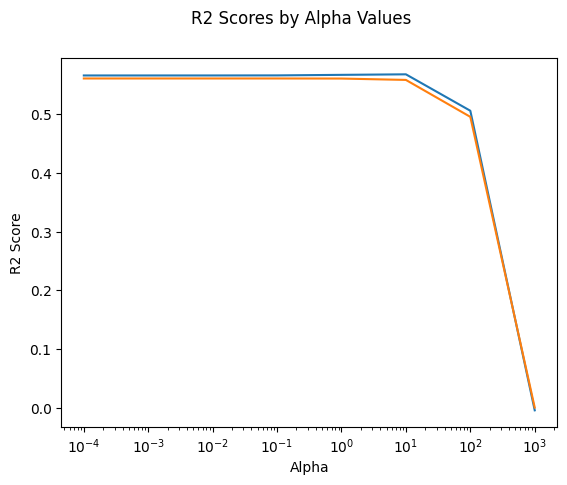

In [256]:
plt.plot(alphas, scores['Test R2'])
plt.plot(alphas, scores['Train R2'])
plt.xscale('log')
plt.suptitle('R2 Scores by Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [257]:
sorted_scores = scores.sort_values(by='Test R2', ascending=False)
sorted_scores.head()

,Train R2,Test R2
10.000,0.558567,0.568117
1.000,0.560895,0.567208
0.100,0.561039,0.566287
0.010,0.561041,0.566181
0.001,0.561041,0.566168


In [258]:
best_alpha = sorted_scores.index[0]
best_alpha

10.0

In [259]:
best_lasso = Lasso(alpha=best_alpha)
best_lasso_pipe = make_pipeline(preprocessor, best_lasso)
best_lasso_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db05b0>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db2110>)],
                                   verbose_feature_names_out=False)),
                ('lasso', Lasso(alpha=10.0))])

In [260]:
train_preds = best_lasso_pipe.predict(X_train)
test_preds = best_lasso_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Lasso Tuned Train')
eval_regression(y_test, test_preds, name='Lasso Tuned Test')

Lasso Tuned Train Scores
MAE: 847.1515 
MSE: 1,306,401.0888 
RMSE: 1,142.9790 
R2: 0.5586

Lasso Tuned Test Scores
MAE: 802.2763 
MSE: 1,191,554.4117 
RMSE: 1,091.5834 
R2: 0.5681



### Tree Regression

2. Your second task is to build a regression tree model to predict sales.

* Build a simple regression tree model.
* Compare the performance of your model based on r^2.
* Compare the performance of your model based on rmse.






In [261]:
dec_tree = DecisionTreeRegressor(max_depth=None, random_state = 42)

dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

dec_tree_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db05b0>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db2110>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [262]:
train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Decision Tree Train')
eval_regression(y_test, test_preds, name='Decision Tree Test')

Decision Tree Train Scores
MAE: 1.1819 
MSE: 801.0418 
RMSE: 28.3027 
R2: 0.9997

Decision Tree Test Scores
MAE: 1,065.2825 
MSE: 2,403,008.5516 
RMSE: 1,550.1640 
R2: 0.1290



#### Tuning Tree Regression

In [263]:
dec_tree1 = DecisionTreeRegressor(max_depth=1, random_state = 42)
dec_tree1_pipe = make_pipeline(preprocessor, dec_tree)

dec_tree1_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db05b0>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db2110>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [264]:
train_preds = dec_tree1_pipe.predict(X_train)
test_preds = dec_tree1_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Dec Tree 1 Train')
eval_regression(y_test, test_preds, name='Dec Tree 1 Test')

Dec Tree 1 Train Scores
MAE: 1.1819 
MSE: 801.0418 
RMSE: 28.3027 
R2: 0.9997

Dec Tree 1 Test Scores
MAE: 1,065.2825 
MSE: 2,403,008.5516 
RMSE: 1,550.1640 
R2: 0.1290



In [265]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree2_pipe = make_pipeline(preprocessor, dec_tree_2)
dec_tree2_pipe.fit(X_train, y_train)
 
train_preds = dec_tree2_pipe.predict(X_train)
test_preds = dec_tree2_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Decision Tree2 Train')
eval_regression(y_test, test_preds, name='Decision Tree2 Test')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Decision Tree2 Train Scores
MAE: 938.6917 
MSE: 1,682,033.3981 
RMSE: 1,296.9323 
R2: 0.4316

Decision Tree2 Test Scores
MAE: 904.9816 
MSE: 1,562,195.0050 
RMSE: 1,249.8780 
R2: 0.4338



In [266]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [267]:
dec_tree.get_depth()

38

In [268]:
dec_tree.get_n_leaves()

6267

In [270]:
depths = list(range(2, 38))

scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])

for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)

    train_preds = dec_tree_pipe.predict(X_train)
    test_preds = dec_tree_pipe.predict(X_test)

    train_score = r2_score(y_train, train_preds)
    test_score = r2_score(y_test, test_preds)

    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score


    print(f'When depth is {depth},')
    print(f'- the training r2 is {train_score.round(3)}.')
    print(f'- the testing r2 is {test_score.round(3)}.')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 2,
- the training r2 is 0.432.
- the testing r2 is 0.434.
When depth is 3,
- the training r2 is 0.524.
- the testing r2 is 0.524.
When depth is 4,
- the training r2 is 0.583.
- the testing r2 is 0.584.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 5,
- the training r2 is 0.604.
- the testing r2 is 0.596.
When depth is 6,
- the training r2 is 0.615.
- the testing r2 is 0.582.
When depth is 7,
- the training r2 is 0.627.
- the testing r2 is 0.579.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 8,
- the training r2 is 0.64.
- the testing r2 is 0.566.
When depth is 9,
- the training r2 is 0.653.
- the testing r2 is 0.551.
When depth is 10,
- the training r2 is 0.67.
- the testing r2 is 0.538.
When depth is 11,
- the training r2 is 0.694.
- the testing r2 is 0.514.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 12,
- the training r2 is 0.721.
- the testing r2 is 0.492.
When depth is 13,
- the training r2 is 0.751.
- the testing r2 is 0.442.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 14,
- the training r2 is 0.783.
- the testing r2 is 0.414.
When depth is 15,
- the training r2 is 0.807.
- the testing r2 is 0.384.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 16,
- the training r2 is 0.831.
- the testing r2 is 0.37.
When depth is 17,
- the training r2 is 0.854.
- the testing r2 is 0.346.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 18,
- the training r2 is 0.877.
- the testing r2 is 0.293.
When depth is 19,
- the training r2 is 0.897.
- the testing r2 is 0.266.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 20,
- the training r2 is 0.916.
- the testing r2 is 0.244.
When depth is 21,
- the training r2 is 0.935.
- the testing r2 is 0.208.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 22,
- the training r2 is 0.949.
- the testing r2 is 0.217.
When depth is 23,
- the training r2 is 0.962.
- the testing r2 is 0.195.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 24,
- the training r2 is 0.972.
- the testing r2 is 0.164.
When depth is 25,
- the training r2 is 0.98.
- the testing r2 is 0.163.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 26,
- the training r2 is 0.986.
- the testing r2 is 0.155.
When depth is 27,
- the training r2 is 0.99.
- the testing r2 is 0.136.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 28,
- the training r2 is 0.993.
- the testing r2 is 0.146.
When depth is 29,
- the training r2 is 0.996.
- the testing r2 is 0.166.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 30,
- the training r2 is 0.998.
- the testing r2 is 0.153.
When depth is 31,
- the training r2 is 0.999.
- the testing r2 is 0.133.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 32,
- the training r2 is 0.999.
- the testing r2 is 0.15.
When depth is 33,
- the training r2 is 1.0.
- the testing r2 is 0.145.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 34,
- the training r2 is 1.0.
- the testing r2 is 0.148.
When depth is 35,
- the training r2 is 1.0.
- the testing r2 is 0.127.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When depth is 36,
- the training r2 is 1.0.
- the testing r2 is 0.148.
When depth is 37,
- the training r2 is 1.0.
- the testing r2 is 0.131.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


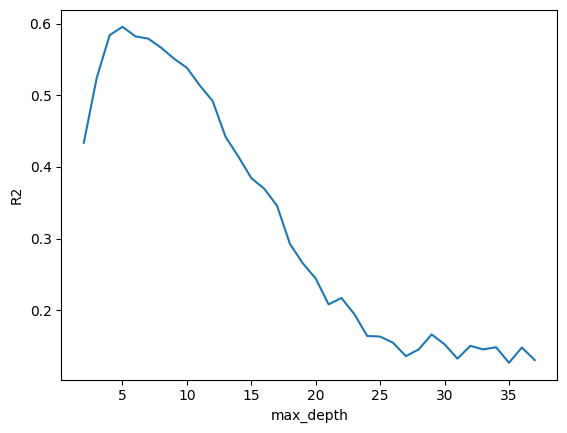

In [271]:
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [272]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.595662,0.603714
4,0.583877,0.582633
6,0.582288,0.614973
7,0.579151,0.626543
8,0.5664,0.63973


In [273]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_pipe5 = make_pipeline(preprocessor, dec_tree_5)
dec_tree_pipe5.fit(X_train, y_train)


train_preds = dec_tree_pipe5.predict(X_train)
test_preds = dec_tree_pipe5.predict(X_test)


train_5_score = r2_score(y_train, train_preds)
test_5_score = r2_score(y_test, test_preds)

print (f'Training r2 is {train_5_score.round(3)}.')
print (f'Testing r2 is {test_5_score.round(3)}.')

Training r2 is 0.604.
Testing r2 is 0.596.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [274]:
eval_regression(y_train, train_preds, name='Decision Tree5 Train')
eval_regression(y_test, test_preds, name='Decision Tree5 Test')


Decision Tree5 Train Scores
MAE: 762.7025 
MSE: 1,172,791.5082 
RMSE: 1,082.9550 
R2: 0.6037

Decision Tree5 Test Scores
MAE: 738.2100 
MSE: 1,115,558.0387 
RMSE: 1,056.1998 
R2: 0.5957



### Bagged Tree

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bagreg = BaggingRegressor(random_state = 42)

In [ ]:
bagreg_pipe = make_pipeline(preprocessor, bagreg)
bagreg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3dd2080>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3dd3340>)],
                                   verbose_feature_names_out=False)),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [ ]:
train_preds = bagreg_pipe.predict(X_train)
test_preds = bagreg_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Bagreg Tree Train')
eval_regression(y_test, test_preds, name='Bagreg Tree Test')

Bagreg Tree Train Scores
MAE: 323.8975 
MSE: 248,172.3610 
RMSE: 498.1690 
R2: 0.9161

Bagreg Tree Test Scores
MAE: 814.2355 
MSE: 1,373,290.9707 
RMSE: 1,171.8750 
R2: 0.5022



#### Tuning Bagged Tree

In [ ]:
estimators = [10, 20, 30, 40, 50, 100]

scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])

for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg_pipe = make_pipeline(preprocessor, bag_reg)
   bag_reg_pipe.fit(X_train, y_train)
   train_preds = bag_reg_pipe.predict(X_train)
   test_preds = bag_reg_pipe.predict(X_test)
   bagreg_train_score = r2_score(y_train, train_preds)
   bagreg_test_score = r2_score(y_test, test_preds)
   scores.loc[num_estimators, 'Train Score'] = bagreg_train_score
   scores.loc[num_estimators, 'Test Score'] = bagreg_test_score

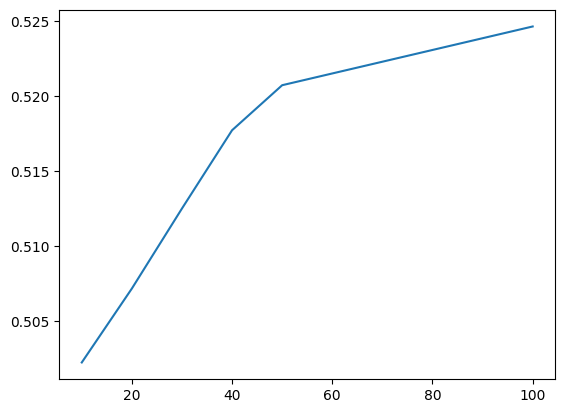

In [ ]:
plt.plot(scores['Test Score'])
plt.show()

In [ ]:
scores = scores.sort_values(by='Test Score', ascending=False)
scores

,Train Score,Test Score
100,0.934827,0.524656
50,0.932349,0.520739
40,0.930908,0.517736
30,0.929256,0.512516
20,0.924616,0.507178
10,0.916143,0.502246


In [148]:
train_preds = bag_reg_pipe.predict(X_train)
test_preds = bag_reg_pipe.predict(X_test)

eval_regression(y_train, train_preds, name='Bagreg Tree Train')
eval_regression(y_test, test_preds, name='Bagreg Tree Test')

Bagreg Tree Train Scores
MAE: 302.0071 
MSE: 192,876.2297 
RMSE: 439.1768 
R2: 0.9348

Bagreg Tree Test Scores
MAE: 796.3137 
MSE: 1,311,462.2678 
RMSE: 1,145.1909 
R2: 0.5247



### Random Forest

In [275]:
from sklearn.ensemble import RandomForestRegressor

In [276]:
rf_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42))
rf_tree_pipe.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db05b0>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8c3db2110>)],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [278]:
train_preds_rf = rf_tree_pipe.predict(X_train)
test_preds_rf = rf_tree_pipe.predict(X_test)
 
eval_regression(y_train, train_preds_rf, name='Random Forest Train')
eval_regression(y_test, test_preds_rf, name='Random Forest Test')

Random Forest Train Scores
MAE: 302.4211 
MSE: 193,519.4297 
RMSE: 439.9084 
R2: 0.9346

Random Forest Test Scores
MAE: 795.2895 
MSE: 1,308,147.1894 
RMSE: 1,143.7426 
R2: 0.5259



In [279]:
feature_names = preprocessor.get_feature_names_out()
feature_names[0:10]

array(['Item_Weight', 'Item_MRP', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods'], dtype=object)

### CRISP-DM Phase 5 - Evaluation​



* I recommend the Random Forest Model out of the current regression options. While it does have some bias,  accounting for just 53% of the variations tested. It out preformed the linear(by far) and the tree model.

* I believe we achived the goal to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

* As seen in these features below 
 * Item_Weight
 * Item_MRP
 * Item_Fat_Content_Low Fat
 * Item_Fat_Content_Regular
 * Item_Type_Baking Goods
 * Item_Type_Breads
 * Item_Type_Breakfast
 * Item_Type_Canned
 * Item_Type_Dairy 
 * Item_Type_Frozen Foods